<a href="https://colab.research.google.com/github/shahriariit/Biogenesis/blob/master/Coronavirus_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import wget

In [0]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py

In [7]:
! rm *.csv

# urls of the files
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

# download files
for url in urls:
    filename = wget.download(url)

rm: cannot remove '*.csv': No such file or directory


In [0]:
# dataset
# --------

conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [12]:
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Confirmed')
deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Deaths')
recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name='Date', value_name='Recovered')


print(conf_df_long.shape)
print(deaths_df_long.shape)
print(recv_df_long.shape)

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'],recv_df_long['Recovered']], axis=1, sort=False)
full_table.tail()

(19650, 6)
(19650, 6)
(18600, 6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
19645,NaN,Malawi,-13.254308,34.301525,4/5/20,4,0,NaN
19646,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,4/5/20,2,0,NaN
19647,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/5/20,1,0,NaN
19648,NaN,South Sudan,6.877000,31.307000,4/5/20,1,0,NaN
19649,NaN,Western Sahara,24.215500,-12.885800,4/5/20,4,0,NaN


In [16]:
data=full_table
len(data['Country/Region'].unique())

183

In [17]:

data = data[data['Country/Region'] ==  'Bangladesh']
data.tail()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
18360,NaN,Bangladesh,23.685,90.3563,4/1/20,54,6,28.0
18622,NaN,Bangladesh,23.685,90.3563,4/2/20,56,6,NaN
18884,NaN,Bangladesh,23.685,90.3563,4/3/20,61,6,NaN
19146,NaN,Bangladesh,23.685,90.3563,4/4/20,70,8,NaN
19408,NaN,Bangladesh,23.685,90.3563,4/5/20,88,9,NaN


In [18]:
prophet=data.iloc[: , [4,5]].copy()
prophet.columns = ['ds','y']

model_case=Prophet()
model_case.fit(prophet)
future=model_case.make_future_dataframe(periods=15)
forecast=model_case.predict(future)

cnfrm = forecast.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','Confirm']
cnfrm.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,Confirm
85,2020-04-16,105.116560
86,2020-04-17,108.200092
87,2020-04-18,111.283624
88,2020-04-19,114.367156
89,2020-04-20,117.450688


In [20]:
prophet_rec=data.iloc[: , [4,7]].copy() 
prophet_rec.columns = ['ds','y']

model_rec=Prophet()
model_rec.fit(prophet_rec)
future_rec=model_rec.make_future_dataframe(periods=15)
forecast_rec=model_rec.predict(future_rec)

rec = forecast_rec.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,Recovery
85,2020-04-16,46.418602
86,2020-04-17,46.893950
87,2020-04-18,47.369299
88,2020-04-19,47.844648
89,2020-04-20,48.319996


In [22]:
prophet_dth=data.iloc[: , [4,6]].copy() 
prophet_dth.columns = ['ds','y']

model_dth=Prophet()
model_dth.fit(prophet_dth)
future_dth=model_dth.make_future_dataframe(periods=15)
forecast_dth=model_dth.predict(future_dth)

dth = forecast_dth.loc[:,['ds','trend']]
dth = dth[dth['trend']>0]
dth=dth.tail(15)
dth.columns = ['Date','Death']
dth.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,Death
85,2020-04-16,11.220376
86,2020-04-17,11.561864
87,2020-04-18,11.903351
88,2020-04-19,12.244839
89,2020-04-20,12.586326


In [28]:
figure = plot_plotly(model_case, forecast)
py.iplot(figure) 

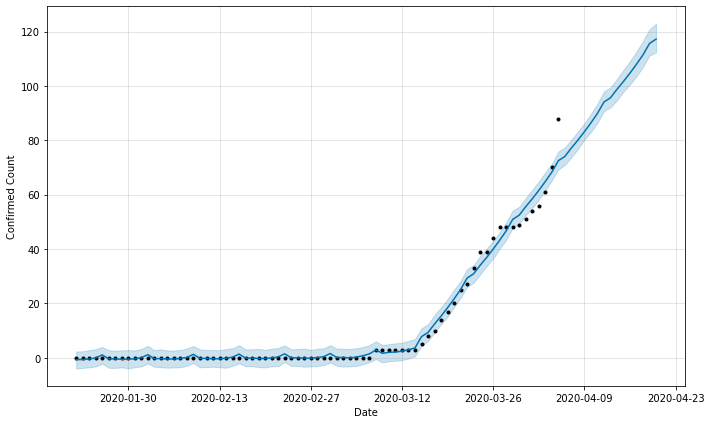

In [29]:
figure = model_case.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

In [30]:
figure_rec = plot_plotly(model_rec, forecast_rec)
py.iplot(figure_rec)

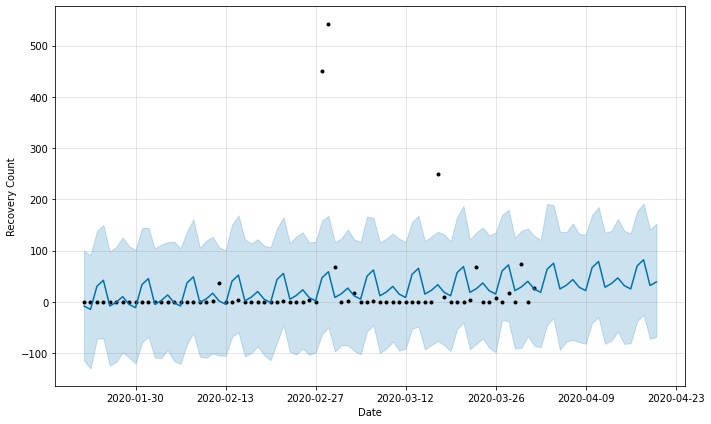

In [31]:
figure_rec = model_rec.plot(forecast_rec,xlabel='Date',ylabel='Recovery Count')

In [32]:
figure_dth = plot_plotly(model_dth, forecast_dth)
py.iplot(figure_dth)

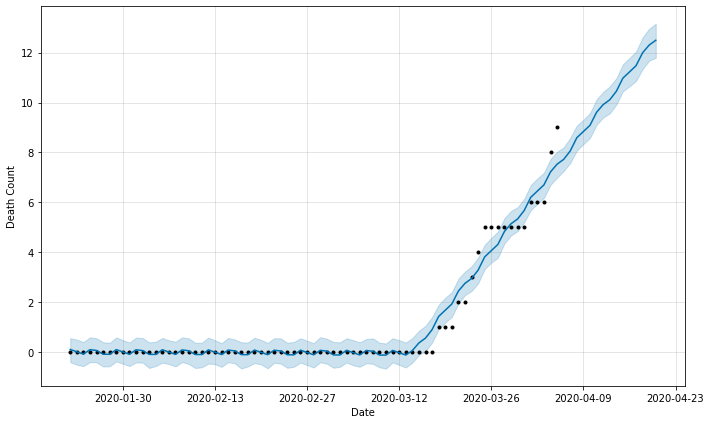

In [33]:
figure_dth = model_dth.plot(forecast_dth,xlabel='Date',ylabel='Death Count')